In [49]:
import numpy as np
from scipy import fft
from scipy.io import loadmat
import matplotlib.pyplot as plt

whale = loadmat('whale.mat',squeeze_me=True,struct_as_record=True)

## 绘制信号时域和频域波形

In [50]:
whale_data = whale['w']
whale_fs = whale['fs']
t = np.arange(0,len(whale_data)/whale_fs,1/whale_fs)

In [64]:
whale_num = len(whale_data)
whale_fftnum = np.power(2,(np.ceil(np.log2(whale_num))))
whale_spec = np.abs(fft.fft(whale_data,int(whale_fftnum)))
whale_power = 20*np.log10(whale_spec/np.max(whale_spec))
whale_freq = (np.arange(whale_fftnum)/whale_fftnum*whale_fs)

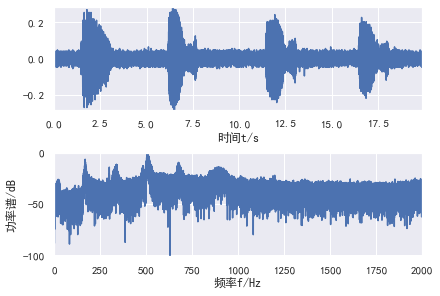

In [173]:
import seaborn as sns
sns.set(style = 'darkgrid')

fig,axs = plt.subplots(2,1,constrained_layout=True)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
axs[0].plot(t,whale_data);axs[0].autoscale(tight=True)
axs[0].set_xlabel('时间t/s')
axs[1].plot(whale_freq[:int(np.floor(whale_fftnum/2)+1)],whale_power[:int(np.floor(whale_fftnum/2)+1)])
axs[1].set_xlabel('频率f/Hz');axs[1].set_ylabel('功率谱/dB')
axs[1].autoscale(tight=True)

## 对信号图形坐标缩放操作

In [171]:
import ipywidgets as widgets
from ipywidgets import interact,interact_manual
from IPython.display import display

def scalefunc(Time_Domain_xaxis,Time_Domain_yaxis,Spec_Domain_xaxis,Spec_Domain_yaxis,Time_Domain_Color,Spec_Domain_Color):
    fig,axs = plt.subplots(2,1,constrained_layout=True)
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来显示负号
    axs[0].plot(t,whale_data,c=Time_Domain_Color);axs[0].autoscale(tight=True)
    axs[0].set_xlabel('时间t/s');axs[0].set_ylabel('幅度')
    t_xaxis = Time_Domain_xaxis;t_yaxis = Time_Domain_yaxis
    axs[0].set_xlim(t_xaxis[0],t_xaxis[1]);axs[0].set_ylim(t_yaxis[0],t_yaxis[1])
    axs[1].plot(whale_freq[:int(np.floor(whale_fftnum/2)+1)],whale_power[:int(np.floor(whale_fftnum/2)+1)],c=Spec_Domain_Color)
    axs[1].autoscale(tight=True)
    axs[1].set_xlabel('频率f/Hz');axs[1].set_ylabel('功率谱/dB')
    s_xaxis = Spec_Domain_xaxis;s_yaxis = Spec_Domain_yaxis
    axs[1].set_xlim(s_xaxis[0],s_xaxis[1]);axs[1].set_ylim(s_yaxis[0],s_yaxis[1])
    
myplot = interact_manual(scalefunc,
                  Time_Domain_xaxis=widgets.FloatRangeSlider(value=(np.min(t),np.max(t)),min=np.min(t),max=np.max(t),step=0.0001,description='Time Domain xaxis:'),
                  Time_Domain_yaxis=widgets.FloatRangeSlider(value=(np.min(whale_data),np.max(whale_data)),min=np.min(whale_data),max=np.max(whale_data),step=0.0001,description='Time Domain yaxis:'),
                  Spec_Domain_xaxis=widgets.FloatRangeSlider(value=(np.min(whale_freq[:int(np.floor(whale_fftnum/2)+1)]),np.max(whale_freq[:int(np.floor(whale_fftnum/2)+1)])),min=np.min(whale_freq[:int(np.floor(whale_fftnum/2)+1)]),max=np.max(whale_freq[:int(np.floor(whale_fftnum/2)+1)]),step=1,description='Spec Domain xaxis:'),
                  Spec_Domain_yaxis=widgets.FloatRangeSlider(value=(np.min(whale_power[:int(np.floor(whale_fftnum/2)+1)]),np.max(whale_power[:int(np.floor(whale_fftnum/2)+1)])),min=np.min(whale_power[:int(np.floor(whale_fftnum/2)+1)]),max=np.max(whale_power[:int(np.floor(whale_fftnum/2)+1)]),step=1,description='Spec Domain yaxis:'),
                  Time_Domain_Color=widgets.Dropdown(options=['black','blue','coral','cyan','gold','pink','red','yellow','magenta'],value='black',description='Time Domain Color:'),
                  Spec_Domain_Color=widgets.Dropdown(options=['black','blue','coral','cyan','gold','pink','red','yellow','magenta'],value='black',description='Spec Domain Color:'))

interactive(children=(FloatRangeSlider(value=(0.0, 19.89275), description='Time Domain xaxis:', max=19.89275, …

## 对信号图形上某点的数值进行读取

In [172]:
def datafunc(Time_Domain_xdata,Spec_Domain_xdata):
    fig,axs = plt.subplots(2,1,constrained_layout=True)
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来显示负号
    axs[0].plot(t,whale_data,alpha=0.7);axs[0].autoscale(tight=True)
    axs[0].set_xlabel('时间t/s');axs[0].set_ylabel('幅度')
    require_x_time = np.around(Time_Domain_xdata*whale_fs)/whale_fs
    x_tloc = np.where(t==require_x_time);y_tval = whale_data[x_tloc]
    axs[0].text(x=require_x_time+0.05,y=y_tval[0]+0.05,s='%f,%f'%(require_x_time,y_tval[0]),fontdict=dict(fontsize=10, color='b',family='Times New Roman',weight='normal')
               ,bbox={'facecolor': 'w', #填充色
              'edgecolor':'gray',#外框色
               'alpha': 0.5, #框透明度
               'pad': 1,#本文与框周围距离 
              })
    axs[0].scatter(require_x_time,y_tval[0],marker='o',c='r',s=20)
    axs[1].plot(whale_freq[:int(np.floor(whale_fftnum/2)+1)],whale_power[:int(np.floor(whale_fftnum/2)+1)],alpha=0.7)
    axs[1].autoscale(tight=True)
    axs[1].set_xlabel('频率f/Hz');axs[1].set_ylabel('功率谱/dB')
    require_x_spec = np.around(Spec_Domain_xdata*whale_fftnum/whale_fs)*(1/whale_fftnum*whale_fs)
    x_sloc = np.where(whale_freq==require_x_spec);y_sval = whale_power[x_sloc]
    axs[1].text(x=require_x_spec-12,y=y_sval[0]-15,s='%f,%f'%(require_x_spec,y_sval[0]),fontdict=dict(fontsize=10, color='b',family='Times New Roman',weight='normal')
               ,bbox={'facecolor': 'w', #填充色
              'edgecolor':'gray',#外框色
               'alpha': 0.5, #框透明度
               'pad': 1,#本文与框周围距离 
              })
    axs[1].scatter(require_x_spec,y_sval[0],marker='o',c='r',s=20)
    
myplot = interact_manual(datafunc,
                  Time_Domain_xdata=widgets.FloatSlider(value=np.min(t),min=np.min(t),max=np.max(t),step=1/whale_fs,description='Time Domain xdata:'),
                  Spec_Domain_xdata=widgets.FloatSlider(value=np.min(whale_freq[:int(np.floor(whale_fftnum/2)+1)]),min=np.min(whale_freq[:int(np.floor(whale_fftnum/2)+1)]),max=np.max(whale_freq[:int(np.floor(whale_fftnum/2)+1)]),step=1/whale_fftnum*whale_fs,description='Spec Domain xdata:'))

interactive(children=(FloatSlider(value=0.0, description='Time Domain xdata:', max=19.89275, step=0.00025), Fl…